In [1]:
##This notebook is a simple implementation of logistic regression from Machine learning perspective, using gradient descent.
## Concepts are well explained in machine learning videos posted by Andrew NG on youtube. Follow it for further explaination 
##


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  
%matplotlib inline
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

    


Using TensorFlow backend.


In [2]:


data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
data=data.dropna()
tempdata=data


    

In [3]:
# Sigmoid is same as logit function. i.e. when sigmoid is applied on input variable, the shape it generates is same as what you see below
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))




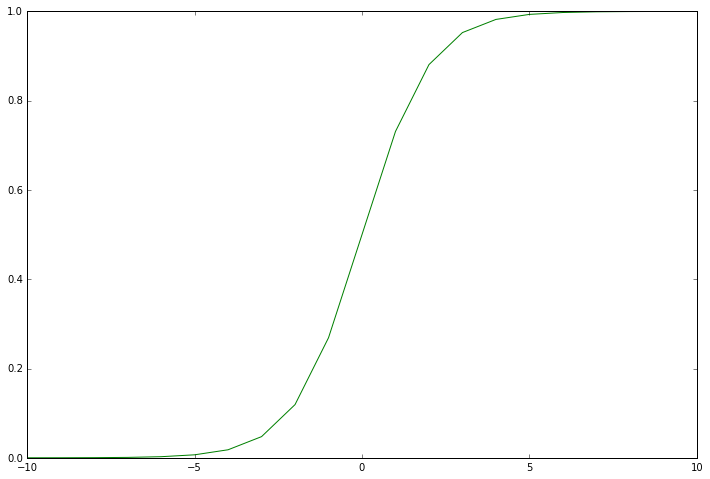

In [4]:
##
num_range = np.arange(-10, 10)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(num_range, sigmoid(num_range), 'g') 


In [5]:
## the cost is the function we use to determine how good the theta value is. Lower the cost, more accurate the theta is.  

def cost(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))




In [6]:
# theta/slope/weights can be used interchangably. All these are multiplied by input variables to get predicted output value close to  real one.
theta = np.matrix(np.array([1,2]))  
print(theta)
t=np.sum(theta)
t



[[1 2]]


3

In [7]:
## I have taken into account only first 3 columns, except "Name", just to show how gradient descent algorithm works

cols = data.shape[1]  
X_train = data.iloc[:,2:6]  
X_test = test.iloc[:,1:5]  
y_train = data.iloc[:,1]

# convert categorical variable into dummy for Matrix calculation.
X_train=X_train.drop('Name',1)
X_test=X_test.drop('Name',1)
X_train['Sex'] = X_train['Sex'].astype(object)
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
X_train=X_train.drop('Sex_female',1)
X_test=X_test.drop('Sex_female',1)

# convert to numpy arrays and initalize the parameter array theta
X_train = np.array(X_train.values)  
X_test = np.array(X_test.values)  
y_train = np.array(y_train.values)  
theta = np.zeros(3) 








In [8]:
### quick check to see if cost function is running smoothly

cost(theta, X_train, y_train)




126.84593404246998

In [9]:
## Now this function finds the gradient of the model parameters that converges to local minima. 
##In other words, gradient which gives least value of cost function is the most desirable one
##This is iterative process, which keeps changing the parameters in order to improve the outcome of the model on the training data. 
def gradient(theta, X_train, y_train):  
    theta = np.matrix(theta)
    X_train = np.matrix(X_train)
    y_train = np.matrix(y_train)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X_train * theta.T) - y_train

    for i in range(parameters):
        term = np.multiply(error, X_train[:,i])
        grad[i] = np.sum(term) / len(X_train)

    return grad





In [10]:
## unlike in linear regression, where we calculate gradient descent in iterative manner, here we use optimizer from scipy library to compute the best gradient descent
# Now once we have this best parameter value from the optimizer, we can feed it to test set to get the prediction 
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X_train, y_train))  
cost(result[0], X_train, y_train)  





116.40083202152502

In [11]:
##
def prediction(theta, X_test):  
    probability = sigmoid(X_test * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  
predictions = prediction(theta_min, X_test)  



c:\users\rishabh khurana\miniconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in greater_equal


In [12]:
##merging Passenger Id and prediction output(Survived) together and writing to output directory
Final_submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
Final_submission.to_csv("out.csv")





